In [241]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [242]:
#Read in the csv files and convert them to a Pandas dataframes
d2015=pd.read_csv('2015.csv')
d2016=pd.read_csv('2016.csv')
d2017=pd.read_csv('2017.csv')
d2018=pd.read_csv('2018.csv')
d2019=pd.read_csv('2019.csv')



Since our data are in 5 different files, each file represent certain year, we need to combine them into one data frame, which we will name  `combined_all_df`.



**After implementing simple checkings as shown in above cells, I come up with the following:**




1. the number of columns is not the same in each dataframe (some years may not have certain columns).

    





2.  Some columns might represent the same data but have different names across the datasets (e.g., "Happiness Rank" vs. "Overall rank", or "Happiness Score" vs. "Score").


3. in each dataframe, there is no column referring to the year when the data was collected.


In [243]:

# Add a 'Year' column to each dataset
d2015['Year'] = 2015
d2016['Year'] = 2016
d2017['Year'] = 2017
d2018['Year'] = 2018
d2019['Year'] = 2019

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [244]:
#we need to looking for how the dataframes are different in shape.
print("d2015= "+str(d2015.shape)+"\n"+ "d2016= "+ str(d2016.shape)+"\n"+"d2017= "+str(d2017.shape)+"\n"+"d2018= "+str(d2018.shape)+"\n"+"d2019= "+str(d2019.shape))



d2015= (158, 13)
d2016= (157, 14)
d2017= (155, 13)
d2018= (156, 10)
d2019= (156, 10)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [245]:
#dataframe of 2019
d2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [246]:
#dataframe of 2019
d2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


In [247]:
# numerical statsticial summary of 2019
d2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,2019.0
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.0
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,2019.0
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,2019.0
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,2019.0
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,2019.0


In [248]:
# categorical statsticial summary of first dataset
d2015.describe(exclude='number')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [249]:
# As mentioned in the kaggle page, the owner of the data is SDSN(Sustainable Development Solutions Network).
# The Sustainable Development Solutions Network (SDSN) was launched in 2012 by UN Secretary-General Ban Ki-moon.
# So, the data's source is generally considered reliable and trustworthy.

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [250]:
# the last update was in 2019

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [251]:
"""
There is no consistency across the multiple data sources,
due to each dataset representing a different year and slightly different criteria

"""

'\nThere is no consistency across the multiple data sources, \ndue to each dataset representing a different year and slightly different criteria\n\n'

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [252]:
#we need to looking for how the columns are different in the name.

print(f"d2015: {list(d2015.columns)}")
print(f"d2016: {list(d2016.columns)}")
print(f"d2017: {list(d2017.columns)}")
print(f"d2018: {list(d2018.columns)}")
print(f"d2019: {list(d2019.columns)}")


d2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
d2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year']
d2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year']
d2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']
d2019: ['Overall rank', 'Country or region', '

In [253]:
"""
Since our analysis is to learn about world happiness, Our objectives are as follows:

1. What countries or regions rank the highest in overall happiness and each of
the six factors contributing to happiness?

2. How did country ranks or scores change between the 2015 and 2016 as well as
the 2016 and 2017 reports?

3. investigate if any country experience a significant increase or decrease in happiness?


we need the following features for analysis:

1. the location feature - exist in all data sources
2. Happiness Rank and Score - exist in all data sources
3. Year - exist in all data sources
4. other features - useful for our analysis

"""

'\nSince our analysis is to learn about world happiness, Our objectives are as follows:\n\n1. What countries or regions rank the highest in overall happiness and each of\nthe six factors contributing to happiness?\n\n2. How did country ranks or scores change between the 2015 and 2016 as well as\nthe 2016 and 2017 reports?\n\n3. investigate if any country experience a significant increase or decrease in happiness?\n\n\nwe need the following features for analysis:\n\n1. the location feature - exist in all data sources\n2. Happiness Rank and Score - exist in all data sources\n3. Year - exist in all data sources\n4. other features - useful for our analysis\n\n'

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [254]:
print(f"data source 2015: {d2015.duplicated().sum()}")
print(f"data source 2016: {d2016.duplicated().sum()}")
print(f"data source 2017: {d2017.duplicated().sum()}")
print(f"data source 2018: {d2018.duplicated().sum()}")
print(f"data source 2019: {d2019.duplicated().sum()}")

data source 2015: 0
data source 2016: 0
data source 2017: 0
data source 2018: 0
data source 2019: 0


In [255]:
# go to delete duplicates columns


#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [256]:
#Display number missing values per column
d2015.isnull().sum().sort_values(ascending = False)

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [257]:
#Display number missing values per column
d2016.isnull().sum().sort_values(ascending = False)

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Lower Confidence Interval,0
Upper Confidence Interval,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0


In [258]:
#Display number missing values per column
d2017.isnull().sum().sort_values(ascending = False)

,0
Country,0
Happiness.Rank,0
Happiness.Score,0
Whisker.high,0
Whisker.low,0
Economy..GDP.per.Capita.,0
Family,0
Health..Life.Expectancy.,0
Freedom,0
Generosity,0


In [259]:
#Display number missing values per column
d2018.isnull().sum().sort_values(ascending = False)

,0
Perceptions of corruption,1
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Year,0


In [260]:
# the above information show that the data source of 2018 has one column has missing values whcich is `Perceptions of corruption`

In [261]:
#Display number missing values per column
d2019.isnull().sum().sort_values(ascending = False)

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Year,0


In [262]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [263]:
# check columns types

In [264]:
d2015.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Standard Error,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64


In [265]:
d2016.dtypes

,0
Country,object
Region,object
Happiness Rank,int64
Happiness Score,float64
Lower Confidence Interval,float64
Upper Confidence Interval,float64
Economy (GDP per Capita),float64
Family,float64
Health (Life Expectancy),float64
Freedom,float64


In [266]:
d2017.dtypes

,0
Country,object
Happiness.Rank,int64
Happiness.Score,float64
Whisker.high,float64
Whisker.low,float64
Economy..GDP.per.Capita.,float64
Family,float64
Health..Life.Expectancy.,float64
Freedom,float64
Generosity,float64


In [267]:
d2018.dtypes

,0
Overall rank,int64
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Year,int64


In [268]:
d2019.dtypes

,0
Overall rank,int64
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Year,int64


In [269]:
# all the columns in each dataframe has the correct data type

In [270]:
# go to clean them

In [271]:
# check outliers

In [272]:
# numerical statsticial summary of 2019
d2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,2019.0
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,0.0
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,2019.0
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,2019.0
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,2019.0
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,2019.0


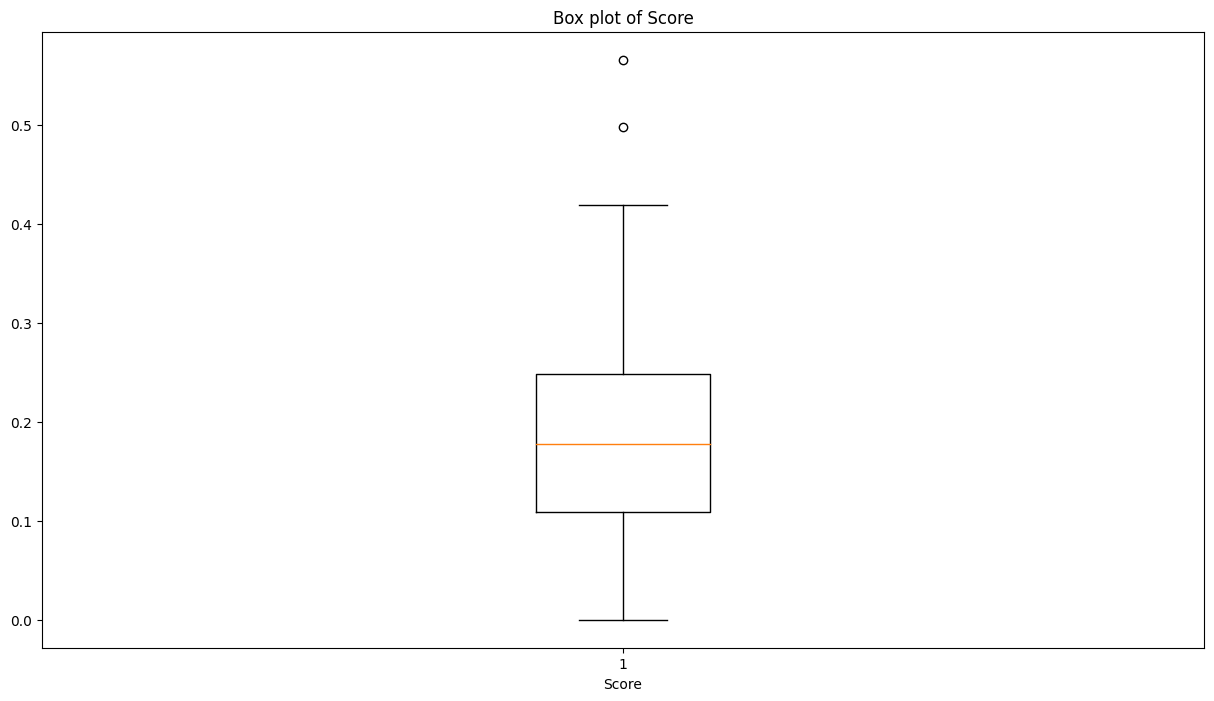

In [273]:
plt.figure(figsize=(15,8))
plt.boxplot(d2019['Generosity'])
plt.xlabel('Score')

plt.title(f'Box plot of Score')
plt.show()

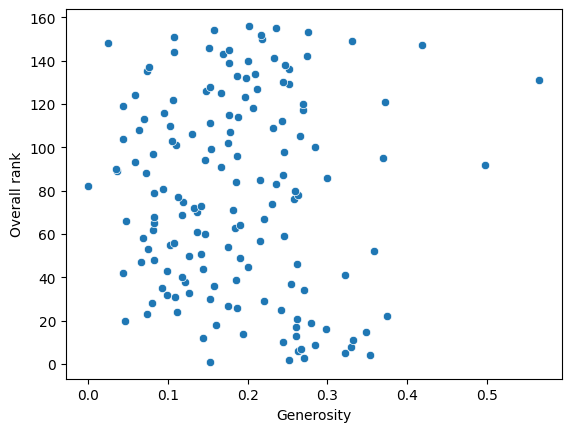

In [274]:
# Create a scatter plot
sns.scatterplot(y='Overall rank', x='Generosity',
                #hue='Category',
                data=d2019)



# Show the plot
plt.show()

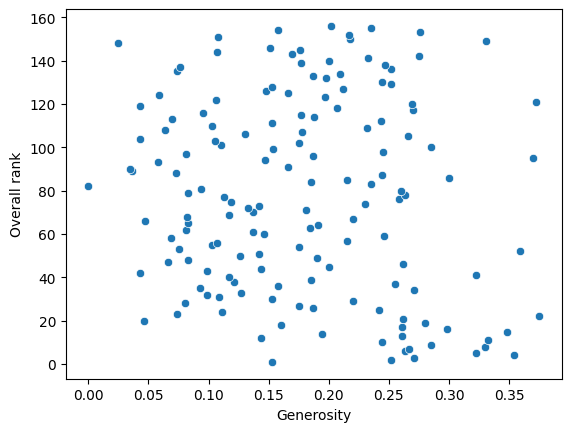

In [275]:

mask=d2019['Generosity']<=0.4
new_df = d2019[mask]



sns.scatterplot(y='Overall rank', x='Generosity',
                #hue='Category',
                data=new_df)



# Show the plot
plt.show()

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [276]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [277]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [278]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [279]:
#There is no important missing values

In [280]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [281]:
# There are no influential errors

In [282]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [283]:
# I spreated the rows that have outliers

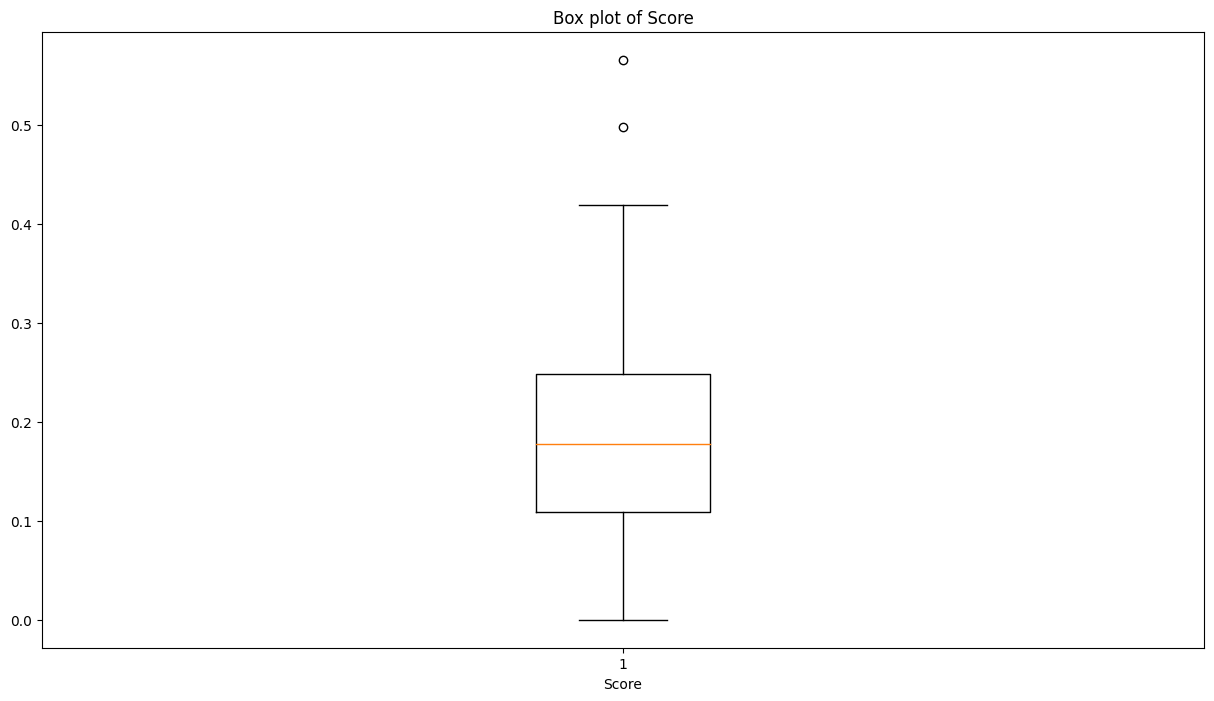

In [284]:
plt.figure(figsize=(15,8))
plt.boxplot(d2019['Generosity'])
plt.xlabel('Score')

plt.title(f'Box plot of Score')
plt.show()

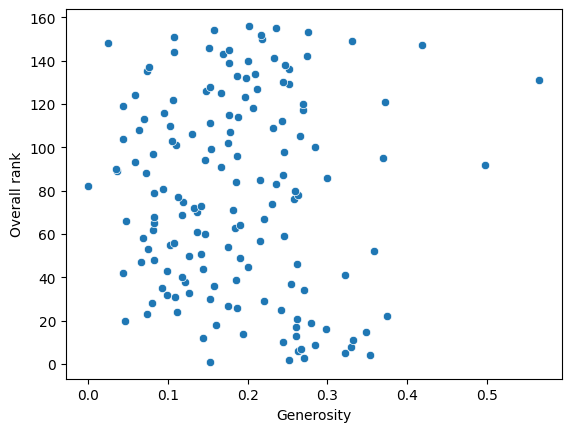

In [285]:
# Create a scatter plot
sns.scatterplot(y='Overall rank', x='Generosity',
                #hue='Category',
                data=d2019)



# Show the plot
plt.show()

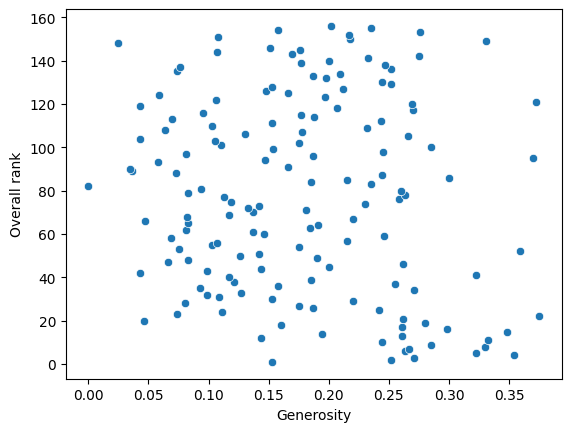

In [286]:

mask=d2019['Generosity']<=0.4
new_df = d2019[mask]



sns.scatterplot(y='Overall rank', x='Generosity',
                #hue='Category',
                data=new_df)



# Show the plot
plt.show()

## 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**Q1.** What countries or regions rank the highest in overall happiness?

In [287]:
Top10 = d2019.sort_values(by='Overall rank', ascending=True).head(10)

In [288]:
Top10[['Country or region', 'Overall rank']]

,Country or region,Overall rank
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5
5,Switzerland,6
6,Sweden,7
7,New Zealand,8
8,Canada,9
9,Austria,10


In [289]:
d2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

**numerical & numerical --> (Scatter plot, line chart)**

**Q2.** Which of the six factors contributing to overall happiness?

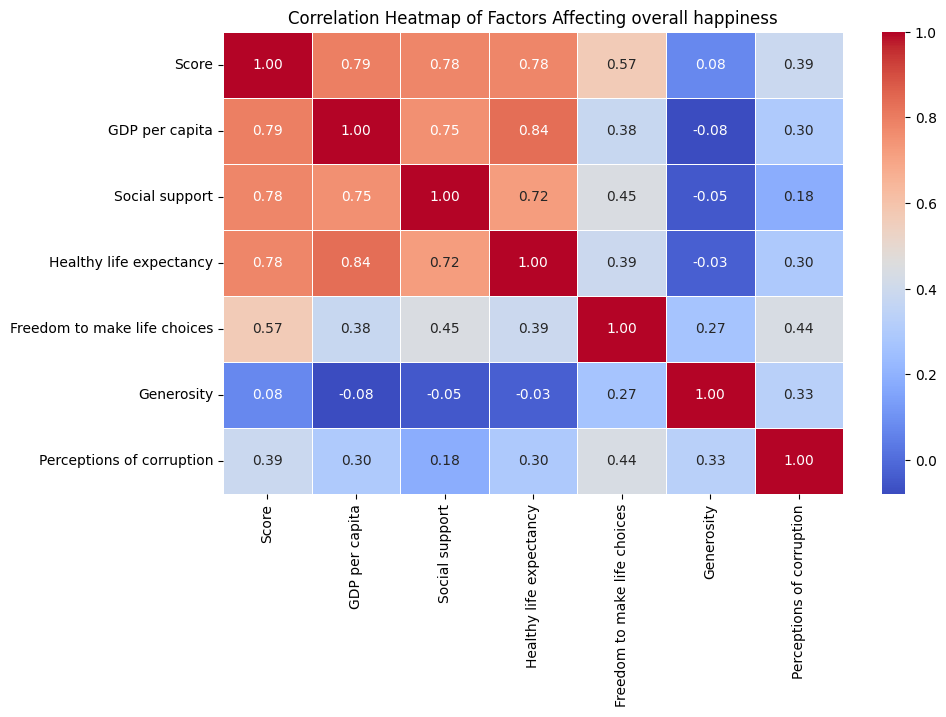

In [290]:
# Compute the correlation matrix
correlation_matrix = d2019[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors Affecting overall happiness')
plt.show()

**Insight #2:** As observed in the heatmap, there is a correlation between the overall happiness score and the six factors in the criteria. Evidently, 'GDP per capita', 'Social support', and 'Healthy life expectancy' have a significant impact on the score, as their values rise with an increase in the overall score.

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

**Q3.** How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?


In [291]:
new_d2015 = d2015[['Country', 'Happiness Rank']]
new_d2015['Year'] = 2015
new_d2016 = d2016[['Country', 'Happiness Rank']]
new_d2016['Year'] = 2016
new_d2017 = d2017[['Country', 'Happiness.Rank']]
new_d2017['Year'] = 2017
new_d2017.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace=True)
merged_df = pd.merge(new_d2015, new_d2016, on='Country', how='inner')


<ipython-input-291-0f496d2f42a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d2015['Year'] = 2015
<ipython-input-291-0f496d2f42a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d2016['Year'] = 2016
<ipython-input-291-0f496d2f42a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [292]:

# Merge the result with the third DataFrame
merged_df = pd.merge(merged_df, new_d2017, on='Country', how='inner')
#merged_df.reset_index(drop=True, inplace=True)
merged_df.rename(columns={'Happiness Rank_x': 'Happiness Rank 2015', 'Happiness Rank_y': 'Happiness Rank 2016', 'Happiness Rank': 'Happiness Rank 2017'}, inplace=True)

In [293]:
# Calculate rank changes between 2015 and 2016, and between 2016 and 2017
merged_df['Change 2015-2016'] = merged_df['Happiness Rank 2016'] - merged_df['Happiness Rank 2015']
merged_df['Change 2016-2017'] = merged_df['Happiness Rank 2017'] - merged_df['Happiness Rank 2016']
merged_df.drop(columns=['Year_x', 'Year_y', 'Year'], inplace=True)

In [294]:
merged_df

,Country,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Change 2015-2016,Change 2016-2017
0,Switzerland,1,2,4,1,2
1,Iceland,2,3,3,1,0
2,Denmark,3,1,2,-2,1
3,Norway,4,4,1,0,-3
4,Canada,5,6,7,1,1
...,...,...,...,...,...,...
141,Rwanda,154,152,151,-2,-1
142,Benin,155,153,143,-2,-10
143,Syria,156,156,152,0,-4
144,Burundi,157,157,154,0,-3


**Q4.** Did any country experience a significant increase or decrease in happiness  between the 2015 and 2016?


In [295]:

Q4_=merged_df.copy()
Q4_.sort_values(by='Change 2015-2016', ascending=True, inplace=True)

In [296]:
Q4=pd.concat([Q4_.head(5) , Q4_.tail(5)])

In [297]:
Q4

,Country,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Change 2015-2016,Change 2016-2017
64,Algeria,68,38,53,-30,15
84,Latvia,89,68,54,-21,-14
122,Cameroon,133,114,107,-19,-7
81,Romania,86,71,57,-15,-14
124,Egypt,135,120,104,-15,-16
70,Vietnam,75,96,94,21,-2
21,Venezuela,23,44,82,21,38
80,Zambia,85,106,116,21,10
73,Nigeria,78,103,95,25,-8
106,Liberia,116,150,148,34,-2


**Insight #4:**
from the table above we can the following:

**Countries with a Significant Improvement:**

Algeria saw a large improvement in happiness, moving up 30 places (from rank 68 to 38) between 2015 and 2016.
Latvia improved by 21 places, moving from rank 89 to 68.

**Countries with a Significant Decline:**

Liberia experienced the most significant decline in happiness, dropping 34 places (from rank 116 to 150).
Nigeria also saw a significant decline, dropping 25 places.
Other countries like Venezuela, Vietnam, and Zambia saw declines of 21 places each.

**Q5.** Did any country experience a significant increase or decrease in happiness  between the 2016 and 2017?


In [298]:
Q5_=merged_df.copy()
Q5_.sort_values(by='Change 2016-2017', ascending=True, inplace=True)

In [299]:
Q5=pd.concat([Q5_.head(5) , Q5_.tail(5)])

In [300]:
Q5

,Country,Happiness Rank 2015,Happiness Rank 2016,Happiness Rank 2017,Change 2015-2016,Change 2016-2017
123,Bulgaria,134,129,105,-5,-24
131,Gabon,143,134,118,-9,-16
94,Hungary,104,91,75,-13,-16
124,Egypt,135,120,104,-15,-16
103,South Africa,113,116,101,3,-15
80,Zambia,85,106,116,21,10
74,Bhutan,79,84,97,5,13
72,Kyrgyzstan,77,85,98,8,13
64,Algeria,68,38,53,-30,15
21,Venezuela,23,44,82,21,38


**Insight #4:**
from the table above we can the following:

**ountries with a Significant Improvement between the 2016 and 2017:**

Bulgaria experienced the most significant improvement, moving up 24 places (from rank 129 to 105) between 2016 and 2017.
Gabon, Hungary, Egypt, and South Africa also showed notable improvements, with all of them improving by at least 15 or 16 places.

**Countries with a Significant Decline between the 2016 and 2017:**

Venezuela experienced the most significant decline, dropping 38 places (from rank 44 to 82) between 2016 and 2017.
Algeria also saw a notable decline, falling 15 places.
Other countries like Zambia, Bhutan, and Kyrgyzstan saw declines ranging from 10 to 13 places.